In [1]:
# General imports 
import os 
import re
import sys
import numpy as np
import pandas as pd
from pathlib import Path
import scipy.stats as stats 
from skimage import measure
import matplotlib.pyplot as plt
import json
import zarr

# Pynwb imports
from hdmf_zarr import NWBZarrIO
from nwbwidgets import nwb2widget

# set paths
sys.path.insert(0, '/code/src')
data_dir = '/data'

# package imports
from bci.loaders import load
from bci.thresholds.thresholds import align_thresholds
from bci.processing import processing

In [3]:
metadata = load.load_filtered_metadata()
sesh = metadata['name'].values[10]
print(sesh)
data = load.load_session_data(sesh)
epoch_data = get_bci_epoch_data(data)
dff_smooth = processing.smooth_dff(epoch_data['dff_bci'])



single-plane-ophys_740369_2025-02-04_17-33-11_processed_2025-08-04_15-49-43
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_740369_2025-02-04_17-33-11_processed_2025-08-04_15-49-43

NWB file: single-plane-ophys_740369_2025-02-04_17-33-11_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_740369_2025-02-04_17-33-11_processed_2025-08-04_15-49-43/single-plane-ophys_740369_2025-02-04_17-33-11_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 740369: ['single-plane-ophys_740369_2025-01-24', 'single-plane-ophys_740369_2025-02-03', 'single-plane-ophys_740369_2025-01-13', 'single-plane-ophys_740369_2025-01-30', 'single-plane-ophys_740369_2025-02-04', 'single-plane-ophys_740369_2025-02-17', 'single-plane-ophys_740369_2025-01-09']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_740369_2025-02-04
total difference in dataframes: 2


/code/src/bci/loaders/load.py:395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bci_trials.dropna(inplace=True, subset=['start_time', 'stop_time', 'threshold_crossing_times'])


In [19]:
n_rois = dff_smooth.shape[0]
n_trials = len(epoch_data['start_bci_trial'])
n_trials
max_trial_duration = np.max(epoch_data['stop_bci_trial'] - epoch_data['start_bci_trial'])

dff_by_trial = np.full((n_rois, n_trials, max_trial_duration*2), np.nan)

for itr, (ist, istp) in enumerate(zip(epoch_data['start_bci_trial'], epoch_data['stop_bci_trial'])):
    dff_by_trial[:, itr, :int(istp-ist)] = dff_smooth[:, ist:istp]

In [ ]:
n_trials = len(bci)
max_tr_duration = np.max(stop-start)
rf_trial = np.full((n_trials,max_tr_duration*2),np.nan)
for itr, (ist,istp) in enumerate(zip((bci['go_cue']*frame_rate).astype(int),(bci['threshold_crossing_times']*frame_rate).astype(int))):

    rf_trial[itr, :int(istp-ist)] = cn_rf[ist:istp]

In [5]:
def get_dff_by_trial(dff_smooth):
    """
    
    """
    n_rois = dff_smooth.shape[0]  # number of neurons
    n_trials = len(epoch_data['start_bci_trial'])  # number of trials 
    max_trial_duration = np.max(epoch_data['stop_bci_trial'] - epoch_data['go_cue'])
    
    # initialize
    dff_by_trial = np.full((n_rois, n_trials, max_trial_duration*2), np.nan)
    
    for i, (start_idx, stop_idx) in enumerate(zip((data['bci_trials']['go_cue']*frame_rate).astype(int), (data['bci_trials']['threshold_crossing_times']*frame_rate).astype(int))):
        df_by_trial[:, itr, :int(stop_idx-start_idx)] = dff_smooth[:, start_idx:stop_idx]
s
    

In [ ]:
cn_index

In [52]:
data['bci_trials'][['start_frame', 'stop_frame', 'low', 'high']]

,start_frame,stop_frame,low,high
0,93553,94061,20.0,40.0
1,94062,94815,20.0,40.0
2,94816,95271,20.0,40.0
3,95272,95729,20.0,40.0
4,95730,96292,20.0,40.0
...,...,...,...,...
66,131083,131615,20.0,100.0
67,132317,132960,20.0,100.0
68,132961,133740,20.0,100.0
69,133741,134481,20.0,100.0


In [53]:
bci = data['bci_trials']

In [67]:
bci[['start_frame', 'stop_frame']] -= bci['start_frame'].values[0]

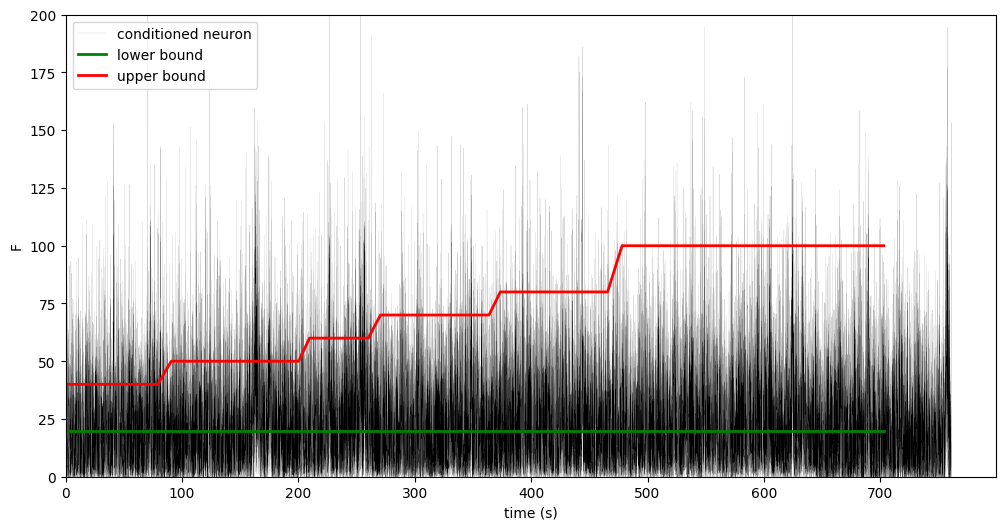

In [192]:
frame_rate = data['frame_rate']
time_seconds = np.arange(len(bci_rf[:, 10])) / frame_rate
start_time_seconds = bci['start_frame'] / frame_rate

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time_seconds, bci_rf[:, 10], linewidth=0.05, alpha=1, c='k', label='conditioned neuron')
ax.plot(start_time_seconds, bci['low'], linewidth=2, c='g', label='lower bound')
ax.plot(start_time_seconds, bci['high'], linewidth=2, c='r', label='upper bound')
# for i in np.unique(bci['high'].values):
    # ax.axhline(i, c='orange')
ax.set_ylim(0, 200)
ax.set_xlim(0)
ax.set_ylabel('F')
ax.set_xlabel('time (s)')
ax.legend()
plt.show()

In [ ]:
frame_rate = data['frame_rate']
time_seconds = np.arange(len(bci_rf[:, 10])) / frame_rate
start_time_seconds = bci['start_frame'] / frame_rate

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time_seconds, bci_rf[:, 10], linewidth=0.05, alpha=1, c='k', label='conditioned neuron')
ax.plot(start_time_seconds, bci['low'], linewidth=2, c='g', label='lower bound')
ax.plot(start_time_seconds, bci['high'], linewidth=2, c='r', label='upper bound')
for i in np.unique(bci['high'].values):
    ax.axhline(i, c='orange')
ax.set_ylim(0, 200)
ax.set_xlim(0)
ax.set_ylabel('$\Delta F / F$')
ax.set_xlabel('time (s)')
ax.legend()
plt.show()

In [106]:
np.where(bci_rf[:, 10] > bci['low'].values[0])[0].shape[0] / len(bci_rf[:])

0.4490804468013088

In [183]:
rf_trial[row, col].

array([35.95598221, 29.05424309, 30.11244392, ..., 27.48417091,
       43.21302032, 37.25979233], shape=(7598,))

In [187]:
rf_t

(7598,)

In [190]:
row

array([ 0,  0,  0, ..., 70, 70, 70], shape=(7598,))

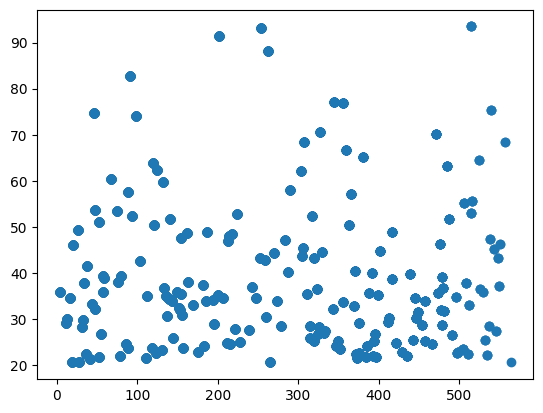

In [189]:
plt.scatter(col, rf_trial[row, col])

In [112]:
max_frame = bci['stop_frame'].values.max()

In [113]:
np.where(bci_rf[:max_frame, 10] > bci['low'].values[0])[0].shape[0] / len(bci_rf[:max_frame])

0.4508346124328473

In [ ]:
n_trials = len(bci)
n_rois = bci_rf.shape[0]

In [141]:
max_tr_duration

np.int64(44315)

In [159]:
n_trials = len(bci)
max_tr_duration = np.max(stop-start)
rf_trial = np.full((n_trials,max_tr_duration*2),np.nan)
for itr, (ist,istp) in enumerate(zip((bci['go_cue']*frame_rate).astype(int),(bci['threshold_crossing_times']*frame_rate).astype(int))):

    rf_trial[itr, :int(istp-ist)] = cn_rf[ist:istp]

In [162]:
rf_trial.shape

(71, 88630)

In [167]:
row, col = np.where(rf_trial[:, :] > bci['low'].values[0])

In [171]:
np.sum(~np.isnan(rf_trial[:, :]))

np.int64(22700)

In [173]:
len(col)/22700

0.3347136563876652

In [161]:
np.where(bci_rf[:max_frame, 10] > bci['low'].values[0])[0].shape[0] / len(bci_rf[:max_frame])

(71, 88630)

In [134]:
istp

29578

amplitude per trial
    amplitude should increase over time
    max amplitude per trial
    
look at timeseries of conditioned neuron

